Preparing the dataset
===

<hr style="border: 2px solid gray">

# Step 1: find dates and locations of sandstorms

[NASA WorldView](https://worldview.earthdata.nasa.gov/?v=42.53496283204216,20.198112059324743,73.78467362462987,34.23809673633836&l=Reference_Labels_15m(hidden),Reference_Features_15m(hidden),Coastlines_15m(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor&lg=true&t=2022-01-21-T13%3A06%3A55Z)

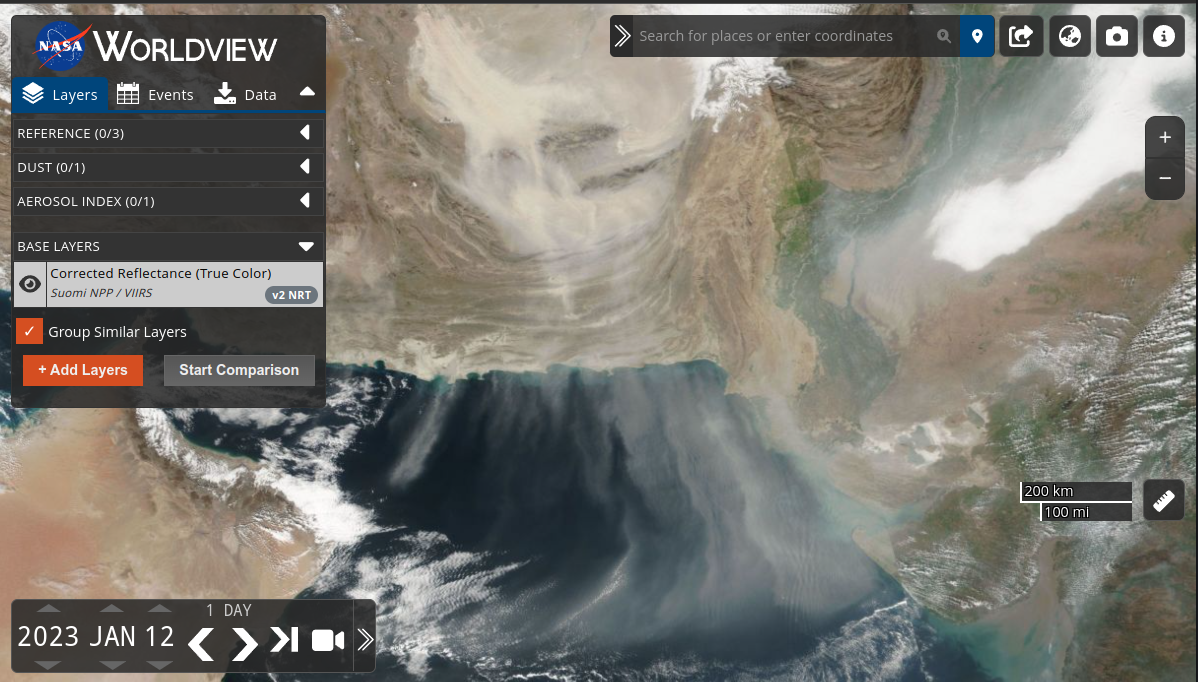

# Step 2: download imagery via [GIBS API](https://nasa-gibs.github.io/gibs-api-docs/)

In [ ]:
from skimage import io
from rastervision.core.box import Box


def get_img(layer_name: str, date: str | None, bbox: Box, height: int,
            width: int, crs: str) -> 'np.ndarray':
    bbox_str = ','.join(map(str, bbox))
    args = dict(
        version='1.3.0',
        service='WMS',
        request='GetMap',
        format='image/png',
        STYLE='default',
        bbox=bbox_str,
        CRS=crs,
        HEIGHT=height,
        WIDTH=width,
        layers=layer_name,
    )
    if date is not None:
        args['TIME'] = date
    query_string = '&'.join(f'{k}={v}' for k, v in args.items())
    url = f'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?{query_string}'
    arr = io.imread(url)
    return arr

In [ ]:
layer_name = 'VIIRS_SNPP_CorrectedReflectance_TrueColor'
bbox = Box(ymin=24, xmin=54, ymax=34, xmax=64)
date = '2022-01-21'

arr = get_img(
    layer_name=layer_name,
    date=date,
    bbox=bbox,
    height=1200,
    width=1200,
    crs='EPSG:4326',
)

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(arr)
plt.show()

In [ ]:
from os.path import join
from rastervision.pipeline.file_system.utils import make_dir
from rastervision.core.data.utils import write_bbox

bbox_str = ','.join(map(str, bbox))
tiff_path = join('data/gibs/img/', f'{date}_{bbox_str}.tif')
make_dir(tiff_path, use_dirname=True)
write_bbox(tiff_path, arr, bbox, crs_wkt='epsg:4326')

# Step 3: label data

> Become one with the data

― Andrej Karpathy, [_A Recipe for Training Neural Networks_](https://karpathy.github.io/2019/04/25/recipe/)

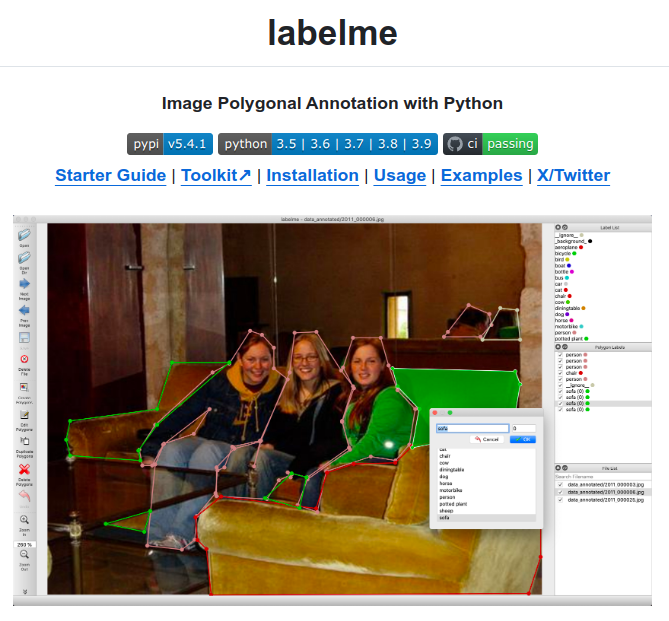

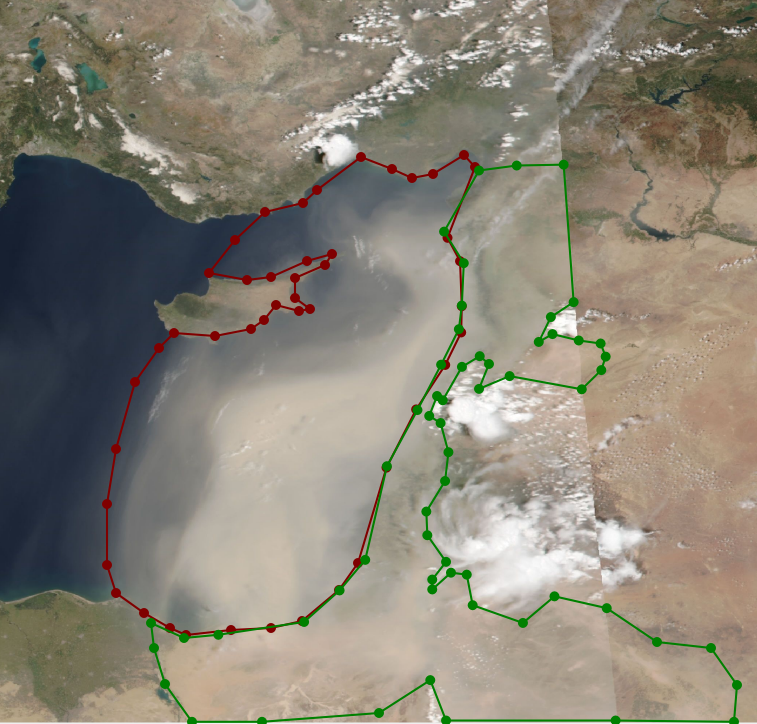

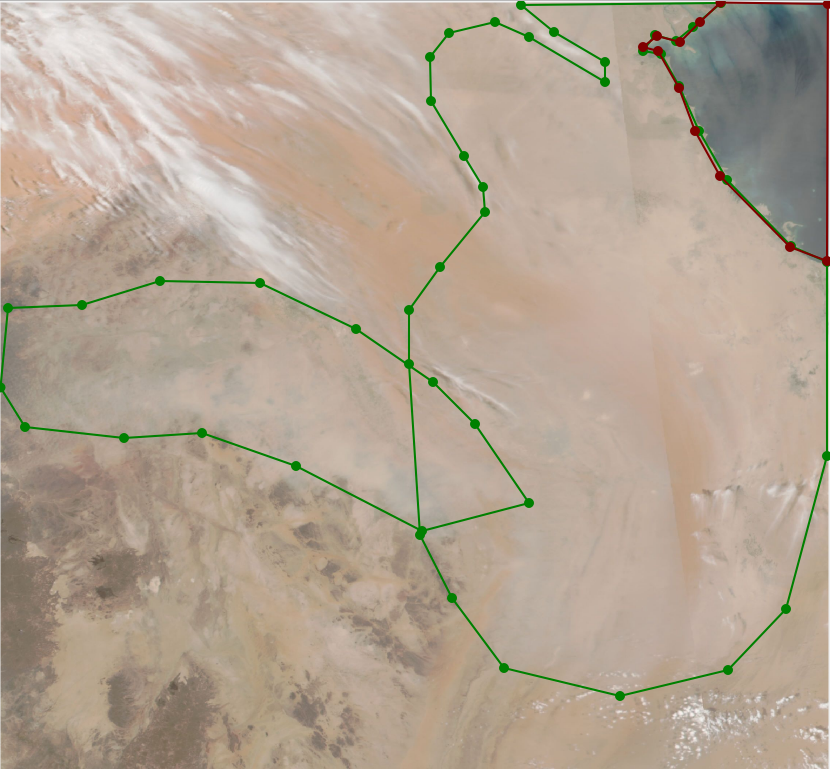

## Training set

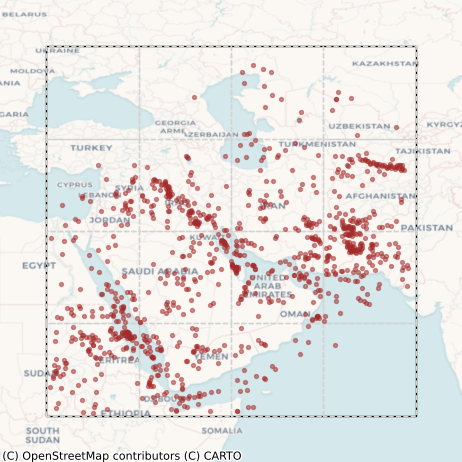

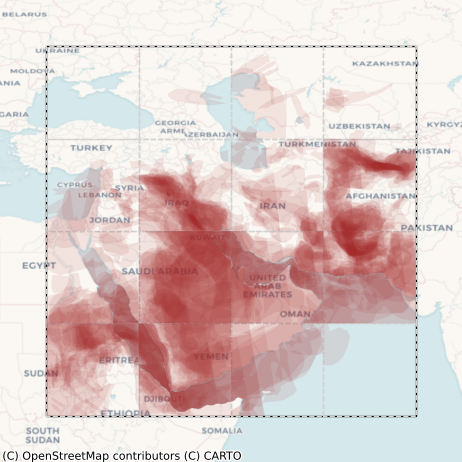

## Test set

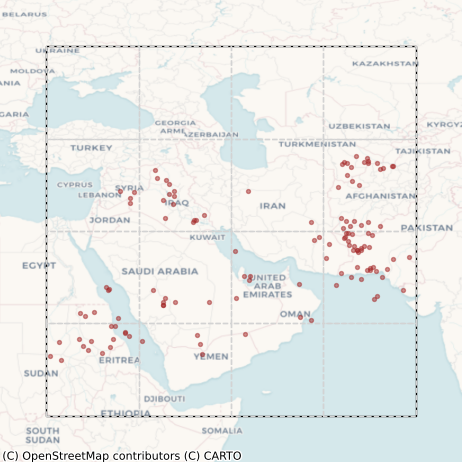

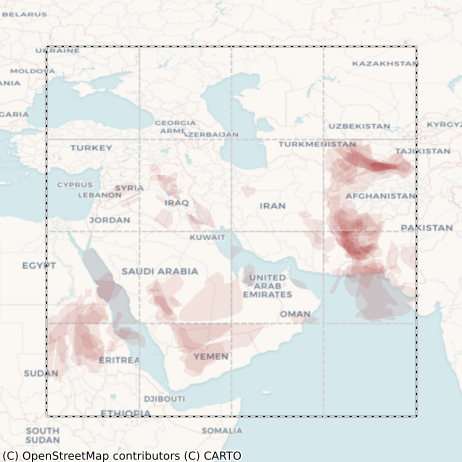